# Forecasting with ARMA

# Challenge

## Task 1 : Data Preparation 

In [1]:
# Importing required liabraries

import numpy as np                                            # working with arrays
import pandas as pd                                           # loading the dataset
import matplotlib.pyplot as plt                               # visualization
import seaborn as sb                                          # visualization and correlation
from statsmodels.tsa.seasonal import seasonal_decompose       # splitting time series data into several components trend, seasonal and residual
from statsmodels.tsa.api import SimpleExpSmoothing            # Liabrary to apply Simple Exponent Technique
from statsmodels.tsa.api import ExponentialSmoothing          # Liabrary to apply Double and Triple Exponent Technique
from statsmodels.tsa.stattools import adfuller                # dickey fuller test for stationary check
from statsmodels.tsa.stattools import acf,pacf                # for finding value of p and q
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf  # for plotting acf & pacf plot
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA                 # for model building
from sklearn.metrics import mean_squared_error                # for model evaluation
import warnings
warnings.filterwarnings('ignore')

### Task 1.1 : Load the dataset into a pandas dataframe. Use only the sales attribute for this challenge 

In [2]:
# Reading CSV data file into DataFrame
sales_df = pd.read_csv(r"C:\Users\Admin\Desktop\Level -1\C1\Repository\DS3_C1_S3_SuperstoreSales_Data_Challenge.csv",parse_dates=['Order Date']) #parse_dates is used for parsing date column to dates

# Previewing the sales data
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-11-10,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# setting order date column as index column
sales_df.set_index('Order Date',inplace=True)

# previewing the sales data again 
sales_df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-08-11,1,CA-2016-152156,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-08-11,2,CA-2016-152156,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-12-06,3,CA-2016-138688,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-11-10,4,US-2015-108966,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-11-10,5,US-2015-108966,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# Using only the sales attribute of the dataframe and storing it in df
df =  sales_df['Sales']

# Previewing the df
df.head()

Order Date
2016-08-11    261.9600
2016-08-11    731.9400
2016-12-06     14.6200
2015-11-10    957.5775
2015-11-10     22.3680
Name: Sales, dtype: float64

### Task 1.2 : Convert the data into proper time series date format 

### Task 1.3 : Sort the data with respect to date if required 

In [5]:
# sorting the data by order date
df.sort_index(ascending=True,inplace=True)

# Previewing the data
df

Order Date
2014-01-02    468.900
2014-01-03    634.116
2014-01-03    362.250
2014-01-03     63.552
2014-01-03      5.940
               ...   
2017-12-30     90.930
2017-12-30      3.024
2017-12-30     20.720
2017-12-30    323.136
2017-12-30     13.904
Name: Sales, Length: 9994, dtype: float64

### Task 1.4 : Resample the data by month 

In [6]:
# Montly resampling the data
resample = df.resample('M').mean()

# Previewing resampled data
resample

Order Date
2014-01-31    221.020656
2014-02-28    148.175674
2014-03-31    326.201821
2014-04-30    204.215008
2014-05-31    200.269149
2014-06-30    213.773946
2014-07-31    226.546449
2014-08-31    252.363650
2014-09-30    276.611815
2014-10-31    238.358255
2014-11-30    246.454823
2014-12-31    262.756284
2015-01-31    341.248679
2015-02-28    203.219137
2015-03-31    265.432540
2015-04-30    239.352003
2015-05-31    174.766749
2015-06-30    189.882883
2015-07-31    217.654364
2015-08-31    281.429933
2015-09-30    240.033558
2015-10-31    206.613387
2015-11-30    179.901805
2015-12-31    216.257738
2016-01-31    247.066130
2016-02-29    390.781032
2016-03-31    257.057228
2016-04-30    240.384457
2016-05-31    249.862776
2016-06-30    206.306577
2016-07-31    205.641322
2016-08-31    195.527377
2016-09-30    177.903145
2016-10-31    221.475212
2016-11-30    228.114625
2016-12-31    273.236537
2017-01-31    286.435004
2017-02-28    213.724314
2017-03-31    245.967381
2017-04-30    

### Task 1.5 : Remove the missing values if they exist 

In [7]:
# checking missing values in data
"""This step has to be done after loading the dataset"""
print(sales_df.isnull().sum())

print("Interpretation : There are no missing values present in sales data")

Row ID           0
Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
Interpretation : There are no missing values present in sales data


### Task 1.6 : Observe if there are any outliers in the data 

Interpretation : So many outliers are present in the sales column. But we cannot remove the outliers because there will be loss of data


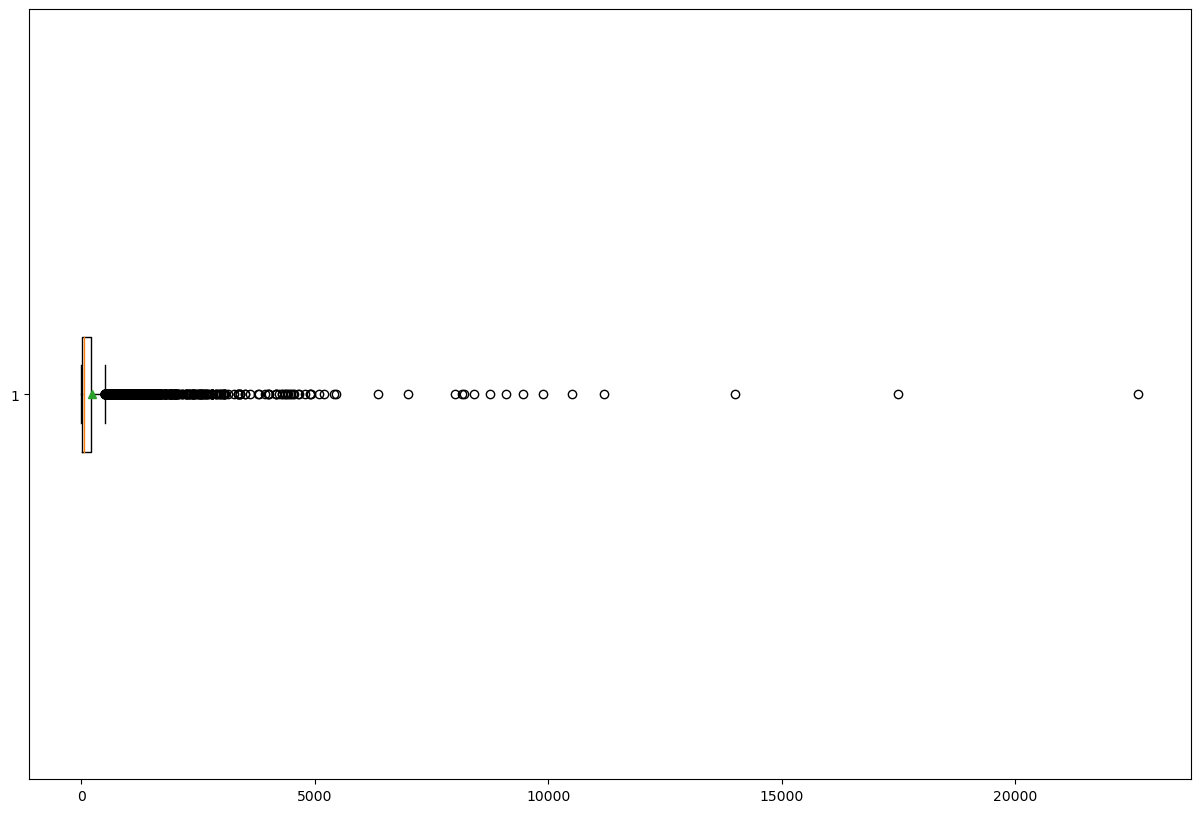

In [8]:
# checking for any outliers in the sales column with the help of boxplot 
"""This step has to be done after loading the dataset"""
plt.figure(figsize=(15,10))  # setting the canvas for boxplot
plt.boxplot(sales_df['Sales'],showmeans=True,vert=False)       # plotting boxplot
plt.plot()

print("Interpretation : So many outliers are present in the sales column. But we cannot remove the outliers because there will be loss of data")

### Task 1.7 : Visualize the data through data decomposition and note your observations about each component of the data 

Interpretation : Sales data is a combination of four components. Secular(trend), Cyclic,Seasonal and Irregular. It is showin downward trend, seasonal component as pattern is repeating after specific time interval and some irregular component as data has no specified pattern


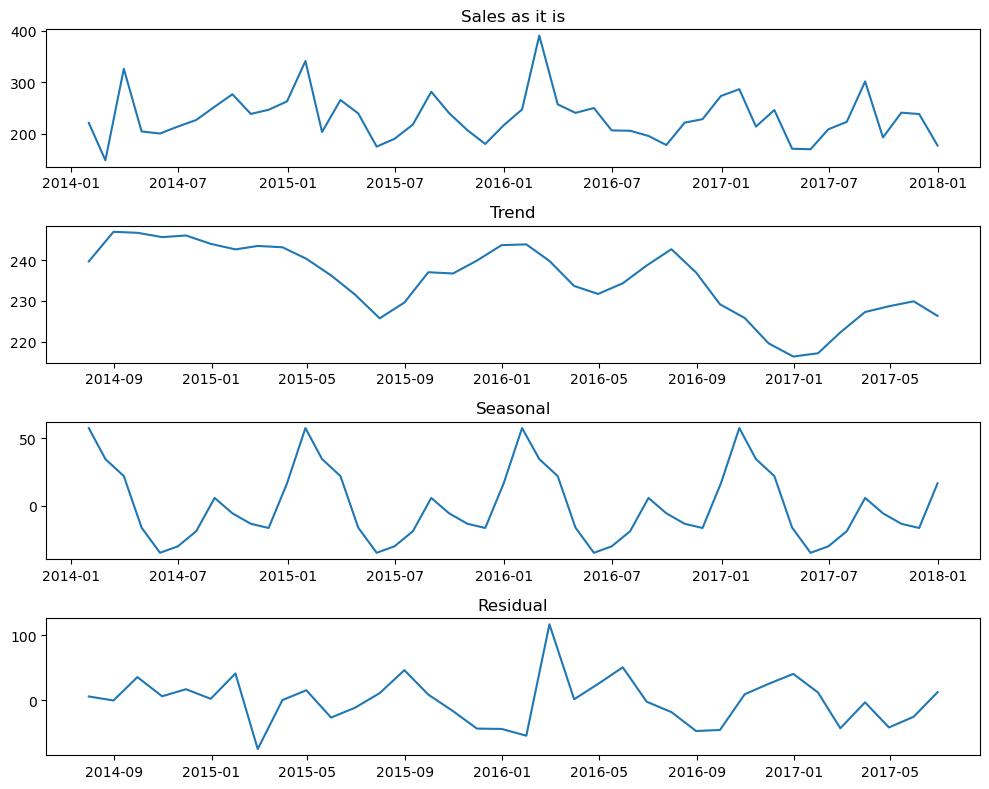

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
"""Plotting different components of the resample data for period =12 """

# different components of the Time series data
# period = 12 since resampled data is monthly
decompose = seasonal_decompose(resample,period=12)
d_trend = decompose.trend
d_seasonal = decompose.seasonal
d_residual = decompose.resid

#Seasonal decompose tells us what components are available in time series data.
# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(10,8))   #setting the canvas

plt.subplot(411)
plt.plot(resample)                          #plotting original sales data
plt.title("Sales as it is")

plt.subplot(412)                            #plotting trend component of the data
plt.plot(d_trend)
plt.title("Trend")

plt.subplot(413)                            #plotting seasonal component of the data
plt.plot(d_seasonal)
plt.title("Seasonal")

plt.subplot(414)                            #plotting residual component of the data
plt.plot(d_residual)
plt.title("Residual")

plt.tight_layout()                          #automatically adjuststing subplot params so that the subplot (s) fits in to the figure area.

print("Interpretation : Sales data is a combination of four components. Secular(trend), Cyclic,Seasonal and Irregular. It is showin downward trend, seasonal component as pattern is repeating after specific time interval and some irregular component as data has no specified pattern")

## Task 2 : Stationarity 

### Task 2.1 : Check if the time series is stationary and use the Augumented  Dickey-Fuller test for stationarity testing.

In [10]:
"""A stationary check on time series data is done using a hypothesis test known as Augumented Dickey-Fuller test.
adfuller() will return pvalue. If it is <0.05, data is stationary model building can start. But if it less >0.05 we need
to make data stationary first before model building"""

def checkStationarity(data):                 #defining the function
    pvalue = adfuller(resample)[1]
    if pvalue<0.05:
        msg="pvalue = {}. Data is Stationary. Proceed to Model Building".format(pvalue)
    else:
        msg="pvalue = {}. Data is not stationary. Make the data stationary before Model Building".format(pvalue)
    return msg

In [11]:
#calling the function
checkStationarity(resample)

'pvalue = 1.4097136094620606e-07. Data is Stationary. Proceed to Model Building'

### Task 2.2 : If the time series is not stationary, apply other methods to achieve stationarity. 

In [12]:
print("Interpretation : As data is stationary, no need to do this task")

Interpretation : As data is stationary, no need to do this task


## Task 3 : Time Series Models

### Task 3.1 : Use ACF and PACF to determine the order of the model with 20 lags. Note p and q values.

Interpretation : From the graph value of p = 1 and q = 4


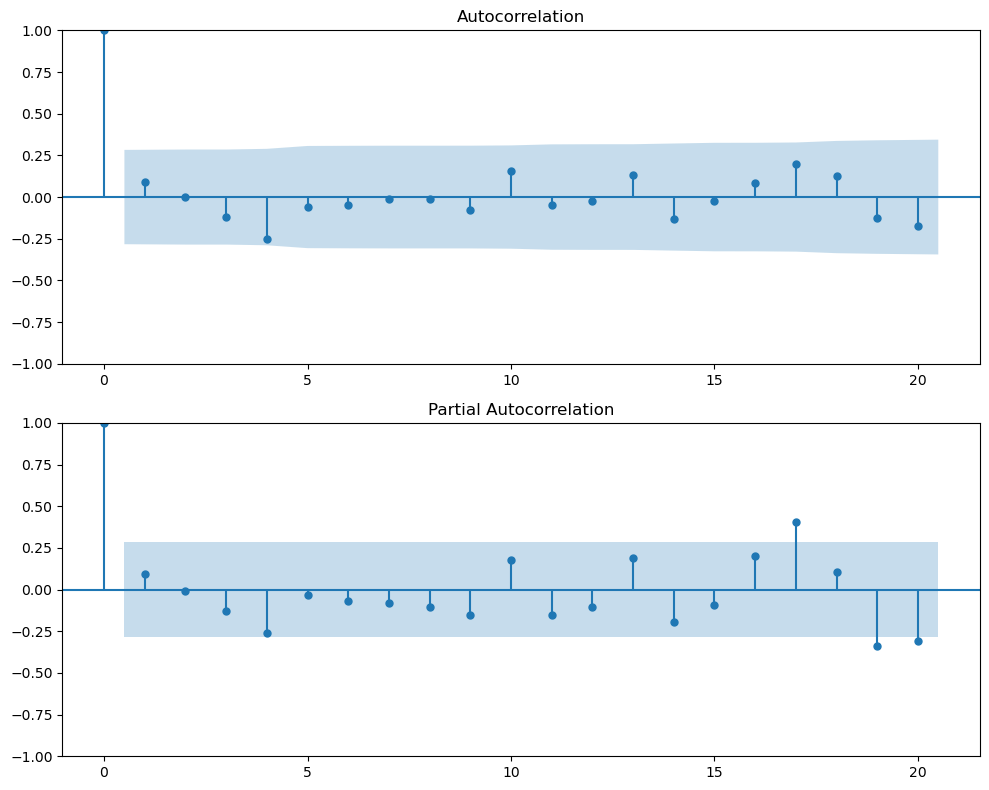

In [13]:
fig = plt.figure(figsize=(10,8))                     # setting the canvas for boxplot
ax1 = fig.add_subplot(211)
"""ACF (Auto correlation function) gives autocorrelation of any values in the time series value with its lagged value.If gives q 
component of ARMA/ARIMA"""
sm.graphics.tsa.plot_acf(resample, lags=20, ax=ax1)  # plotting autocorrelation plot

"""PACF (Partial auto correlation function) gives correlation of residuals in the time series value with its lagged value.If gives p 
component of ARMA/ARIMA"""
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(resample, lags=20, ax=ax2) # plotting partial autocorrelation plot

plt.tight_layout()                                   # automatically adjuststing subplot params so that the subplot (s) fits in to the figure area.

print("Interpretation : From the graph value of p = 1 and q = 4")

### Task 3.2 : Prepare AR model once stationarity is achieved. Find out the most suitable AR model by comparing different lag values. 

In [14]:
# AR with p=1

ar_m1 = ARIMA(resample,order=(1,0,0)).fit()       # model building
print(ar_m1.summary())                            # printing summary of the model

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -251.859
Date:                Sun, 10 Sep 2023   AIC                            509.719
Time:                        09:56:16   BIC                            515.333
Sample:                    01-31-2014   HQIC                           511.840
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        231.8919      8.802     26.346      0.000     214.641     249.143
ar.L1          0.0894      0.163      0.548      0.584      -0.231       0.409
sigma2      2113.1276    380.403      5.555      0.0

In [15]:
# AR with p=2

ar_m2 = ARIMA(resample,order=(2,0,0)).fit()       # model building
print(ar_m2.summary())                            # printing summary of the model

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -251.858
Date:                Sun, 10 Sep 2023   AIC                            511.716
Time:                        09:56:16   BIC                            519.201
Sample:                    01-31-2014   HQIC                           514.544
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        231.9041      8.742     26.527      0.000     214.770     249.038
ar.L1          0.0901      0.163      0.553      0.581      -0.230       0.410
ar.L2         -0.0082      0.263     -0.031      0.9

In [16]:
# AR with p=3

ar_m3 = ARIMA(resample,order=(3,0,0)).fit()       # model building
print(ar_m3.summary())                            # printing summary of the model

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -251.427
Date:                Sun, 10 Sep 2023   AIC                            512.854
Time:                        09:56:16   BIC                            522.210
Sample:                    01-31-2014   HQIC                           516.389
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        231.9240      7.786     29.788      0.000     216.664     247.184
ar.L1          0.0901      0.163      0.554      0.580      -0.229       0.409
ar.L2          0.0171      0.245      0.070      0.9

### Interpretation:
AIC score of AR(1) model is  509.719

AIC score of AR(2) model is  511.716

AIC score of AR(3) model is  512.854

Lesser the AIC score is better the model. Hence AR(1) is the better model

### Task 3.3 : Prepare a MA model using stationary data. Find out the most suitable MA model by comparing different lag values

In [17]:
# MA with q=1

ma_m1 = ARIMA(resample,order=(0,0,1)).fit()       # model building
print(ma_m1.summary())                            # printing summary of the model

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -251.861
Date:                Sun, 10 Sep 2023   AIC                            509.723
Time:                        09:56:16   BIC                            515.336
Sample:                    01-31-2014   HQIC                           511.844
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        231.9053      8.730     26.564      0.000     214.795     249.016
ma.L1          0.0879      0.163      0.539      0.590      -0.231       0.407
sigma2      2113.6270    381.696      5.537      0.0

In [18]:
# MA with q=2

ma_m2 = ARIMA(resample,order=(0,0,2)).fit()       # model building
print(ma_m2.summary())                            # printing summary of the model

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -251.847
Date:                Sun, 10 Sep 2023   AIC                            511.693
Time:                        09:56:16   BIC                            519.178
Sample:                    01-31-2014   HQIC                           514.522
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        231.7102      9.093     25.483      0.000     213.889     249.532
ma.L1          0.0954      0.163      0.587      0.557      -0.223       0.414
ma.L2          0.0385      0.280      0.138      0.8

In [19]:
# MA with q=3

ma_m3 = ARIMA(resample,order=(0,0,3)).fit()       # model building
print(ma_m3.summary())                            # printing summary of the model

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -251.536
Date:                Sun, 10 Sep 2023   AIC                            513.071
Time:                        09:56:17   BIC                            522.427
Sample:                    01-31-2014   HQIC                           516.607
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        232.0721      6.845     33.906      0.000     218.657     245.487
ma.L1          0.0131      0.169      0.077      0.938      -0.318       0.344
ma.L2         -0.0023      0.233     -0.010      0.9

In [20]:
# MA with q=4

ma_m4 = ARIMA(resample,order=(0,0,4)).fit()       # model building
print(ma_m4.summary())                            # printing summary of the model

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(0, 0, 4)   Log Likelihood                -249.163
Date:                Sun, 10 Sep 2023   AIC                            510.326
Time:                        09:56:17   BIC                            521.553
Sample:                    01-31-2014   HQIC                           514.569
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        234.0829      2.528     92.605      0.000     229.129     239.037
ma.L1         -0.0277      0.269     -0.103      0.918      -0.555       0.499
ma.L2          0.1932      0.926      0.209      0.8

### Interpretation:
AIC score of MA(1) model is  509.723

AIC score of MA(2) model is  511.693

AIC score of MA(3) model is  513.071

AIC score of MA(4) model is  510.322
Lesser the AIC score is better the model. Hence MA(1) is the better model

### Task 3.4 : Prepare ARMA model(s). Find out best ARMA model by comparing different lag values

In [21]:
#splitting the data into train and test

ss = int(0.7*len(resample))

train = resample.iloc[:ss]
test = resample.iloc[ss:]
print("train = {}, test ={}".format(len(train),len(test)))

train = 33, test =15


In [22]:
# starting with initial values of p&q

p = 1; q = 1
m1 = ARIMA(train,order=(p,0,q))    # model building
r1 = m1.fit()                      # model fitting
print(r1.summary())                # printing summary of the model

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   33
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -175.068
Date:                Sun, 10 Sep 2023   AIC                            358.136
Time:                        09:56:17   BIC                            364.122
Sample:                    01-31-2014   HQIC                           360.150
                         - 09-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        234.5957     11.926     19.671      0.000     211.222     257.970
ar.L1         -0.0086      3.780     -0.002      0.998      -7.417       7.400
ma.L1          0.0936      3.781      0.025      0.9

In [23]:
# starting with initial values of p&q

p = 2; q = 1
m2 = ARIMA(train,order=(p,0,q))    # model building
r2 = m2.fit()                      # model fitting
print(r2.summary())                # printing summary of the model

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   33
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -172.798
Date:                Sun, 10 Sep 2023   AIC                            355.595
Time:                        09:56:18   BIC                            363.078
Sample:                    01-31-2014   HQIC                           358.113
                         - 09-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        238.1617      2.846     83.674      0.000     232.583     243.740
ar.L1          0.8943      0.239      3.738      0.000       0.425       1.363
ar.L2         -0.2471      0.200     -1.234      0.2

In [24]:
# starting with initial values of p&q

p = 1; q = 4
m3 = ARIMA(train,order=(p,0,q))    # model building
r3 = m3.fit()                      # model fitting
print(r3.summary())                # printing summary of the model

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   33
Model:                 ARIMA(1, 0, 4)   Log Likelihood                -172.437
Date:                Sun, 10 Sep 2023   AIC                            358.873
Time:                        09:56:18   BIC                            369.349
Sample:                    01-31-2014   HQIC                           362.398
                         - 09-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        237.9580      3.026     78.632      0.000     232.027     243.889
ar.L1          0.1127      0.949      0.119      0.905      -1.747       1.973
ma.L1         -0.2520      8.689     -0.029      0.9

### Interpretation:
AIC score of ARMA(1,1) model is 358.136

AIC score of ARMA(2,1) model is 355.595

AIC score of ARMA(1,4) model is 358.873

Lesser the AIC score is better the model. Hence ARMA(2,1) is the better model

## Task 4 : Forecasting Sales 

### Task 4.1 : Predict test sets and visualize forecast and ground truth  

In [25]:
start = 0                         # start index of test data
end = len(test)-1                 # ending index of test data
print("start = {}, end = {}".format(start,end))       #printing results

start = 0, end = 14


In [26]:
# predictions
predictions = r2.predict(0,len(test)-1)  # using r1 model to predict
print(predictions)

Order Date
2014-01-31    238.161738
2014-02-28    236.949897
2014-03-31    233.845727
2014-04-30    261.507470
2014-05-31    235.460667
2014-06-30    243.596471
2014-07-31    252.318450
2014-08-31    257.061768
2014-09-30    258.013865
2014-10-31    251.957529
2014-11-30    241.411886
2014-12-31    240.840366
2015-01-31    237.627623
2015-02-28    227.026341
2015-03-31    203.870352
Freq: M, Name: predicted_mean, dtype: float64


In [27]:
# actual vs predicted values
print("test = {}, predicted = {}".format(len(test), len(predictions) ))   #checking lengths of test and predicted data.They should be same for plot

actual = []; pred = []                             # defining empty lists to store actual and predicted data

for i in range(len(predictions)):                  # appending actaul and predicted values in empty lists
    actual.append(test[i])
    pred.append(predictions[i])

df_res = pd.DataFrame({"actual":actual, "predicted":predictions})  # creating dataframe to store actual test and forecasted data
df_res['err']= df_res.actual - df_res.predicted                    # adding error column in the dataframe
print(df_res)

test = 15, predicted = 15
                actual   predicted        err
Order Date                                   
2014-01-31  221.475212  238.161738 -16.686526
2014-02-28  228.114625  236.949897  -8.835273
2014-03-31  273.236537  233.845727  39.390810
2014-04-30  286.435004  261.507470  24.927535
2014-05-31  213.724314  235.460667 -21.736353
2014-06-30  245.967381  243.596471   2.370910
2014-07-31  170.620094  252.318450 -81.698356
2014-08-31  169.636707  257.061768 -87.425061
2014-09-30  208.481771  258.013865 -49.532094
2014-10-31  222.877408  251.957529 -29.080121
2014-11-30  301.495235  241.411886  60.083349
2014-12-31  192.635345  240.840366 -48.205020
2015-01-31  240.813096  237.627623   3.185473
2015-02-28  238.149973  227.026341  11.123632
2015-03-31  176.922968  203.870352 -26.947384


### Task 4.2 : Use a known evaluation metric and residual plots to interpret the results. Use RMSE for evaluation 

In [28]:
# model evaluation
p = 2; q= 1
msg = 'ARMA Model. Order=(' + str(p) + ',' + str(q) + ')'
mse = mean_squared_error(df_res.actual, df_res.predicted)                #MSE score
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse, np.sqrt(mse)))       # printing MSE and RMSE score of the model

ARMA Model. Order=(2,1)
	MSE = 1827.882097856359
	RMSE = 42.7537378232168


In [29]:
# LJung-Box test to find white noise
"""LJung-Box test on time series data is done to identify white noise .
sm.stats.acorr_ljungbox() will return pvalue. If it is <0.05, model is bad. But if it less >0.05 mdel is good."""


pvalue = sm.stats.acorr_ljungbox(r2.resid,lags=[1],return_df=True)['lb_pvalue'].values    #p-value
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


<AxesSubplot:xlabel='Order Date'>

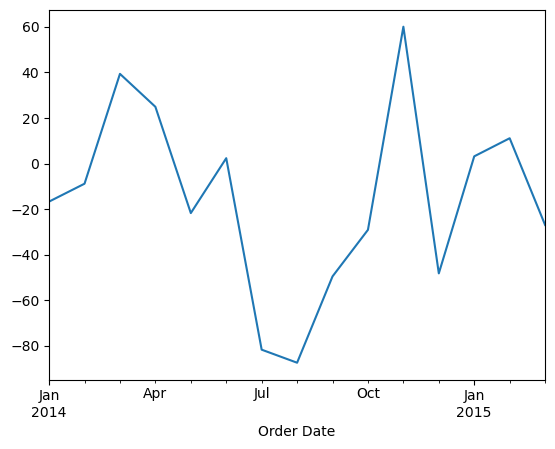

In [30]:
# plotting error
df_res.err.plot()

### Task 4.3 : Visualize the predicted and forecasted sales data with actual sales data 

Text(0.5, 1.0, 'ARMA Model. Order=(2,1)')

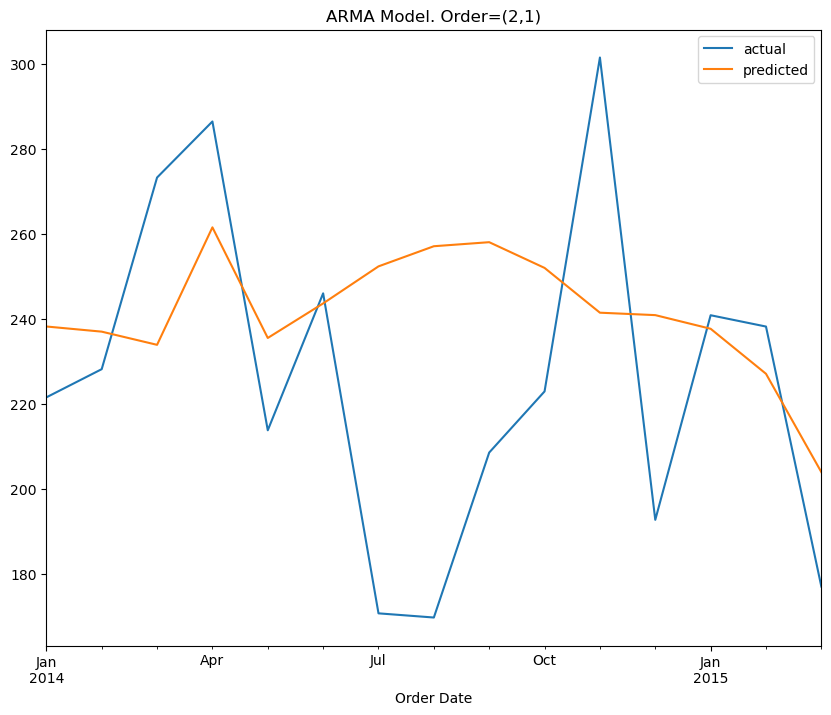

In [31]:
df_res.actual.plot(figsize=(10,8),legend=True)     # plotting actual data
df_res.predicted.plot(legend=True)                 # plotting predicted data
plt.title(msg)